In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
df=pd.read_csv("/content/drive/MyDrive/DeepLearning/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
#drop unwanted column
df.drop('Id',axis=1,inplace=True)

In [30]:
#How many class in target variable species
df["Species"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
#How many samples in this multiple class 
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

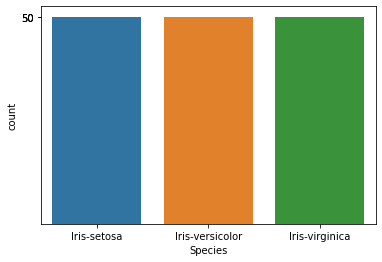

In [32]:
#How many samples in this multiple class represent in visualize form
import seaborn as sns
sns.countplot(data=df,x="Species")
c=df["Species"].value_counts()
plt.yticks(c)
plt.show()

In [33]:
#Check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

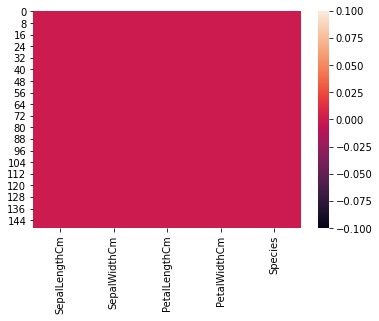

In [34]:
#visulize
sns.heatmap(df.isnull())
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
#apply Label Encoder on species target column : - means to convert object type data into numeric type
from sklearn.preprocessing import LabelEncoder

#create object of LabelEncoder class
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
#check
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:


df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [38]:
#Separate input and output from dataset
X=df.drop("Species",axis=1)
Y=df["Species"]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [40]:
#apply scaling on X_train and X_test data
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [41]:
from keras.layers import Dropout
from keras import regularizers

In [42]:
#create a neural network 
import tensorflow as tf
model=tf.keras.Sequential([
      tf.keras.layers.Dense(3,activation='relu',input_shape=(X.shape[1],)), #hidden layer1
      tf.keras.layers.Dense(2,activation='relu'), #hidden layer2
      tf.keras.layers.Dense(3,activation='softmax') #output layer
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 9         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Compile the  model
from keras.optimizers import Adam 
#specify learning rate  
#in adam learning rate we change as per our requirement to improve module accuracy
model.compile(optimizer=Adam(learning_rate=(0.1)),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [45]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=100,batch_size=30,validation_split=0.20,verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 75ms/step - loss: 1.1562 - accuracy: 0.3452 - val_loss: 0.9305 - val_accuracy: 0.7143
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8848 - accuracy: 0.6548 - val_loss: 0.7463 - val_accuracy: 0.7143
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6610 - accuracy: 0.6548 - val_loss: 0.4784 - val_accuracy: 0.7143
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4884 - accuracy: 0.6667 - val_loss: 0.3539 - val_accuracy: 0.8095
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3917 - accuracy: 0.8333 - val_loss: 0.3066 - val_accuracy: 0.9048
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3528 - accuracy: 0.9405 - val_loss: 0.2963 - val_accuracy: 0.9048
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3138 - accuracy: 0.8690 - val_loss: 0.2559 - val_accuracy: 0.9048
Epoch 8/100
3/3 [===

In [46]:
print("training=",model.evaluate(X_train,Y_train))
print("testing=",model.evaluate(X_test,Y_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9714
training= [0.08592233061790466, 0.9714285731315613]
2/2 [==============================] - 0s 7ms/step - loss: 0.0775 - accuracy: 0.9556
testing= [0.07753129303455353, 0.9555555582046509]


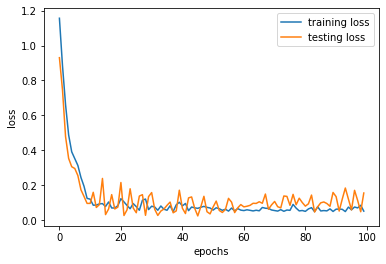

In [47]:
plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["training loss","testing loss"])
plt.show()


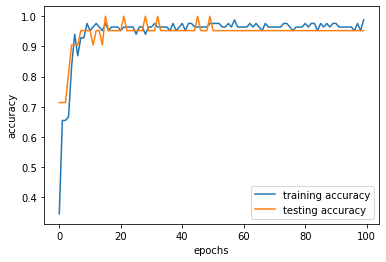

In [48]:
plt.plot(trained_model.history["accuracy"])
plt.plot(trained_model.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["training accuracy","testing accuracy"])
plt.show()


In [ ]:
#testing the model
Y_pred=model.predict(X_test)
Y_pred

array([[3.91206640e-16, 8.42870668e-06, 9.99991536e-01],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [1.03421303e-06, 9.85647321e-01, 1.43516045e-02],
       [1.68997540e-05, 9.98548687e-01, 1.43442629e-03],
       [9.06665446e-05, 9.97748792e-01, 2.16056593e-03],
       [1.34182671e-16, 4.37190965e-06, 9.99995589e-01],
       [4.56978398e-07, 9.52035308e-01, 4.79642339e-02],
       [1.08838164e-13, 2.66254414e-04, 9.99733746e-01],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [1.50318229e-08, 3.25579971e-01, 6.74419940e-01],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [9.06665446e-05, 9.97748792e-01, 2.16056593e-03],
       [9.96533036e-01, 3.19421524e-03, 2.72808626e-04],
       [1.20270101e-06, 9.88616168e-01, 1.13826571e-02],
       [7.57051578e-17, 3.07734695e-06, 9.99996901e-01],
       [1.52122202e-05, 9.98586

In [ ]:
#select highest probability from Y_pred 
Y_pred=Y_pred.argmax(axis=1)
Y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


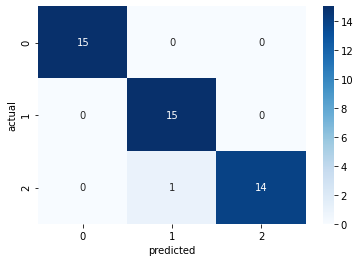

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),fmt='d',cmap="Blues",annot=True)
plt.xlabel("predicted")
plt.ylabel('actual')
plt.show()